In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import random

In [133]:
def lerp(a,b,x):
    return a + (b-a) * x

def expected_value(arr):
    n = sum(arr)
    total = 0
    for i,x in enumerate(arr):
        total += x * i
    return total/n

def deathsfn(probs, pop):
    '''
    pop: population >1 y.o.
    probs: list of probability of death at 5 year age intervals
    '''
    pops = [pop]
    deaths = []
    ps = []
    for y in range(80):
        y1 = y // 5
        y2 = y // 5 + 1
        x = (y % 5) / 5
        p = lerp(probs[y1], probs[y2], x)
        ps.append(p)
        pops.append( (1-p) * pops[-1] )
        deaths.append( p * pops[-1])
    return pops,deaths,ps

def update(pops, drs, brs, famine_chance):
    old = pops
    pops = [0]*81
#     print(pops, old, drs, brs)
    deaths = []
    births = 0
    for y in range(80):
        y1 = y // 5
        y2 = y // 5 + 1
        x = (y % 5) / 5
        
        p = lerp(drs[y1], drs[y2], x)
        br = lerp(brs[y1], brs[y2], x)
        if random.random() < famine_chance:
            p * 1.5
            br = br / 2.
        if random.random() < famine_chance:
            p * 0.5
            br = br * 1.5
        ps.append(p)
        pops[y+1] = ( (1-p) * old[y] )
        deaths.append( p * old[y])
        births += old[y] * 0.5 * br
    pops[0] = births
    return pops, deaths, births

[1000, 472, 383, 331, 307, 297, 290, 283, 273, 257, 236, 209, 176, 137, 92, 33, 2]
[1106, 491, 373, 339, 316, 307, 277, 285, 273, 257, 236, 209, 176, 137, 92, 33, 2]
[1035, 486, 412, 376, 311, 311, 296, 297, 302, 267, 230, 214, 181, 142, 88, 34, 2]
[1073, 493, 427, 334, 332, 345, 320, 297, 283, 264, 253, 238, 178, 143, 94, 35, 2]
[1007, 468, 421, 350, 319, 319, 294, 289, 293, 268, 263, 211, 190, 159, 102, 35, 2]
[1034, 497, 374, 347, 322, 310, 284, 293, 275, 254, 259, 221, 182, 147, 93, 34, 2]
[998, 464, 429, 351, 299, 329, 332, 293, 282, 270, 230, 219, 185, 143, 90, 35, 2]
[1065, 512, 396, 324, 323, 319, 318, 299, 273, 252, 264, 222, 171, 152, 106, 35, 2]
[1072, 504, 419, 331, 306, 320, 298, 301, 291, 279, 244, 205, 185, 147, 101, 35, 2]
[977, 495, 420, 354, 329, 319, 305, 315, 293, 274, 258, 209, 175, 148, 95, 36, 2]
[1099, 571, 406, 338, 336, 340, 301, 319, 267, 269, 258, 224, 189, 147, 97, 37, 2]
[1133, 510, 412, 326, 350, 301, 309, 304, 300, 311, 250, 213, 192, 157, 96, 38, 2]
[10

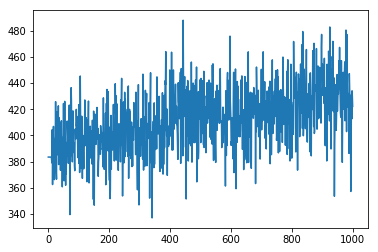

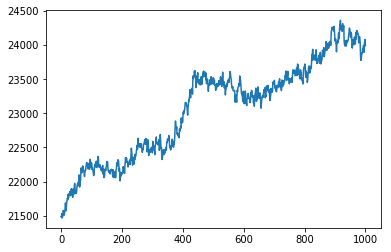

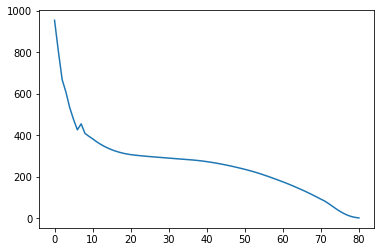

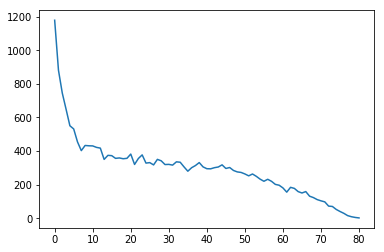

In [150]:
drs = [0.2, 0.045, 0.035, 0.02, 0.007, 0.005, 0.005, 0.005,
    0.01, 0.015, 0.02, 0.03, 0.04, 0.06, 0.1, 0.3, 0.6] + [0.04] * 40
brs = [0., 0., 0., 0.01, 0.02, 0.55, 0.45, 0.25, 0.1, 0., 0., 0., 0., 0., 0., 0., 0.]
pops, _, _ = deathsfn(drs, 1000)
famine_chance = 0.1

pop_list = [pops]
for year in range(1000):
    p, deaths, births = update(pop_list[-1], drs, brs, famine_chance)
    #print(p, births)
    pop_list.append(p)

div = 40
for i in range(len(pop_list) // div):
    i = i * div
    p = pop_list[i]
    print([int(p[i]) for i in range(0,len(p), 5)])
    #plt.plot(p)
    #plt.show()
y10 = []
for p in pop_list:
    #print(p[10])
    y10.append(p[10])
plt.plot(y10)
plt.show()

totals = []
for p in pop_list:
    totals.append(sum(p))
plt.plot(totals)
plt.show()

plt.plot(pop_list[10])
plt.show()
plt.plot(pop_list[-10])
plt.show()

[1000, 472, 383, 331, 307, 297, 290, 283, 273, 257, 236, 209, 176, 137, 92, 33, 2]


331

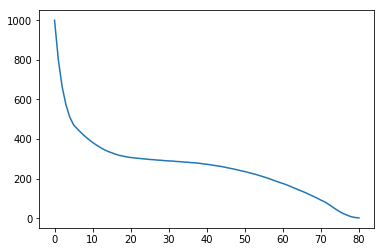

In [138]:
pops, deaths,ps = deathsfn(drs, 1000)
pops = [int(x) for x in pops]
plt.plot(pops)
print(pops[0::5])
pops[15]

40.1076588086681

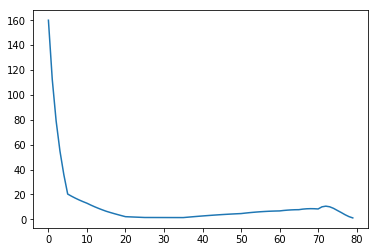

In [139]:
plt.plot(deaths)
x = 5
expected_value(deaths[x:]) + x

6.8999999999999995


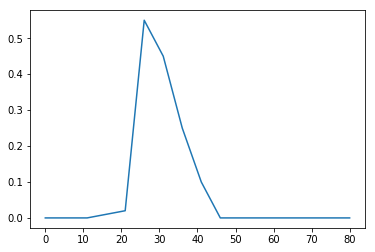

In [147]:
births = [0]
for y in range(80):
    y1 = y // 5
    y2 = y // 5 + 1
    x = (y % 5) / 5
    br = lerp(brs[y1], brs[y2], x)
    #print(y1, y2, x, br)
    births.append(br)
plt.plot(births)
print(sum(births))


In [143]:
y = 5
y1 = y // 5
y2 = y // 5 + 1
x = (y % 5) / 5
arr = [1, 2, 3]
out = lerp(arr[y1], arr[y2], x)
print(y1, y2, x, out)

1 2 0.0 2.0
